In [5]:

#
# EMRA 2020/2021 Lecture 1 complementary notebook
#
#                   HIDING A STAR
#

In [6]:
# In this notebook you will be able to change the wavelength of observation of a star behind a cloud. 
# These notebooks should also be useful for showing you how to make nice plots for your project reports

Optical depth is τ =  1.0115403760000001


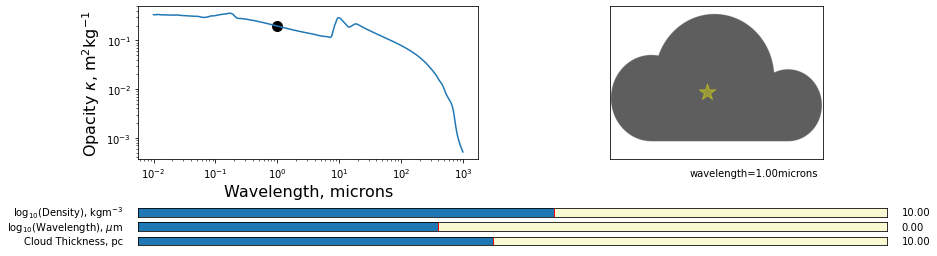

In [7]:
#                                                                                                                                               
# Libraries -- don't worry about this, it just gives us ready made tools for things like plotting                                               
#                                                                                                                                               

import numpy as np                         # a bunch of useful stuff                                                                            
import matplotlib.pyplot as plt            # plotting                                                                                           
from scipy.interpolate import interp1d     # for interpolation                                                                                  
from matplotlib.widgets import Slider

#                                                                                                                                               
# Here you can specify your input values                                                                                                        
#                                                                                                                                               

#Wavelength of observation (in microns)                                                                                                         

lambdaObs = 1.0

#thickness of cloud (in parseces)                                                                                                               

CloudThickness = 10.0

#Density of cloud (hydrogen atoms per cubic metre)                                                                                              
CloudDensity = 1.e10


#                                                                                                                                               
#                                                                                                                                               

opacityFile="./albedo.dat"

#load the data from the file. I'm skipping the first two rows of the file as they are just text, not data                                       
opacityData=np.loadtxt(opacityFile, skiprows=2)

#The units are in cm^2/g, so convert to the SI units that we use in this course                                                                 
opacityData[:,2] = opacityData[:,2]*1.e3/1.e4 #1.e3 converts /g to /kg and 1./1.e4 converts cm^2 to m^2                                         

#Interpolate over the opacity data to find out what the opacity is for the wavelength of observation specified                                  
f = interp1d(opacityData[:,0], opacityData[:,2])
kappa=f(lambdaObs)

mHydrogen = 1.67e-27       # mass of a single hydrogen atom                                                                                     
parsecInMetres = 3.08e16   # 1 parsec, in metres                                                                                                

#work out the optical depth                                                                                                                     
tau = kappa * CloudDensity * mHydrogen * CloudThickness * parsecInMetres

print("Optical depth is \u03C4 = ", tau)

#And adjust the transparency of the star based on how optically thick/thin the cloud is                                                         
StarAlpha = 1.0*np.exp(-tau)

#load a simple cloud image                                                                                                                      
Cloudfile="./Cloud.png"
cloud = plt.imread(Cloudfile)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
plt.subplots_adjust(left=0.25, bottom=0.35)
axcolor = 'lightgoldenrodyellow'
axlam = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axrho = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axsize = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
lam0 = np.log10(1.0)

lamMin = np.log10(0.01)
lamMax = np.log10(1000.)
rhoMin = 5.0
rhoMax= 14.0
rho0=10.0
delta_rho=0.1
delta_lam=0.01

cloudMin=1.0
cloudMax=20.0
delta_cloud=0.5
cloud0=10.0

slam = Slider(axlam, 'log$_{10}$(Wavelength), $\mu$m', lamMin, lamMax, valinit=lam0, valstep=delta_lam)
srho = Slider(axrho, 'log$_{10}$(Density), kgm$^{-3}$', rhoMin, rhoMax, valinit=rho0, valstep=delta_rho)
ssize = Slider(axsize, 'Cloud Thickness, pc', cloudMin, cloudMax, valinit=cloud0, valstep=delta_cloud)

lamString="{:.2f}".format(lambdaObs)
TitleString= "wavelength="+lamString+"microns"
lamlabel=plt.text(15., 8., TitleString)
ax1.loglog(opacityData[:,0], opacityData[:,2])           #plot the opacity data                                                                 
op=ax1.scatter(lambdaObs, kappa, color="black", s=100)    #plot the point we have chosen                                                        
ax1.set_ylabel("Opacity $\kappa$, m$^2$kg$^{-1}$", fontsize=16)
ax1.set_xlabel("Wavelength, microns", fontsize=16)
ax2.set_xlim(1,986)
ax2.set_ylim(708,1)
ax2.set_xticks([])
ax2.set_yticks([])

star=ax2.scatter(450,400, marker='*', color="yellow", s=300, alpha=StarAlpha)
ax2.imshow(cloud)

def update(val):
    lambdaObs = 10.**(slam.val)
    newCloudDensity=10.**(srho.val)
    newCloudThickness=ssize.val
    kappa = f(lambdaObs)
    xx = np.vstack ((lambdaObs, kappa))
    op.set_offsets (xx.T)
    lamString="{:.9f}".format(lambdaObs)
    TitleString= "wavelength="+lamString+"microns"
#    plt.title(TitleString)                                                                                                                     
    lamlabel.set_text(TitleString)
    tau = kappa * newCloudDensity * mHydrogen * newCloudThickness * parsecInMetres
    StarAlpha = 1.0*np.exp(-tau)
    star.set_alpha(StarAlpha)
#    draw()                                                                                                                                     
    #    op.set_xdata(lambdaObs)                                                                                                                
#    op.set_ydata(f(lambdaObs))                                                                                                                 

#    fig.canvas.draw_idle()                                                                                                                     

slam.on_changed(update)
ssize.on_changed(update)
srho.on_changed(update)

plt.show()



